Welcome to the example docs for diff_classifier.  This example will walk you through using diff_classifier to track particle trajectories from a video collected via fluorescence microscopy, or some other imaging technique.  

In [1]:
import os
import os.path as op
from diff_classifier import aws as aws
import diff_classifier.heatmaps as hm
import diff_classifier.imagej as ij

In [ ]:
os.getcwd()

In [2]:
prefix = '0_4_agarose_low_HA_vid_5'
rfolder = '10_8_18_HA_agarose_MPT'
local_folder = '.'
bucket = 'mckenna.data'
ires = 512
frames = 651
aws.download_s3('{}/msd_{}.csv'.format(rfolder, prefix), '{}/msd_{}.csv'.format(local_folder, prefix), bucket_name=bucket)
filename = '{}.csv'.format(prefix)
local_name = op.join(local_folder, filename)

In [ ]:
print(filename)
print(local_name)

Finally, the user can plot the MSDs of the individual trajectories.  This function also calculates the geometrically averaged MSDs and the standard deviation of the logs of the MSDs.

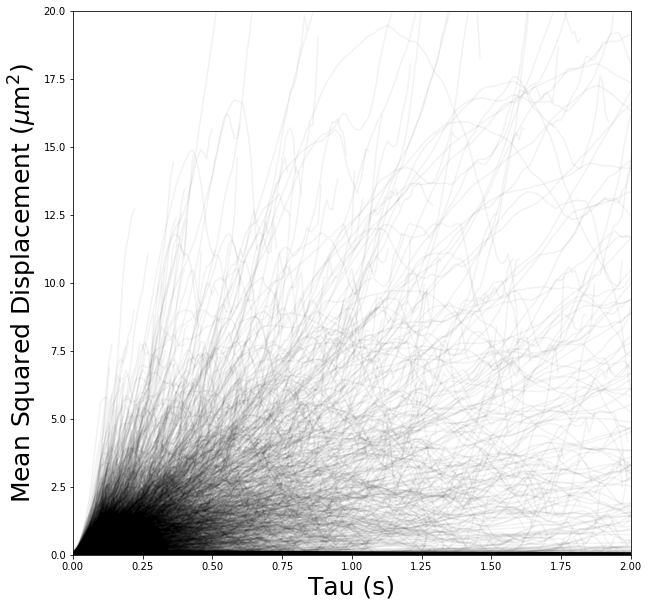

In [3]:
gmean1, gSEM1 = hm.plot_individual_msds(prefix, x_range= 2, umppx=0.07, alpha=0.05, folder=local_folder, remote_folder=rfolder, upload=False, bucket=bucket)

In [4]:
aws.upload_s3('{}/geomean_{}.csv'.format(local_folder, prefix), '{}/geomean_{}.csv'.format(rfolder, prefix), bucket_name=bucket)
aws.upload_s3('{}/geoSEM_{}.csv'.format(local_folder, prefix), '{}/geoSEM_{}.csv'.format(rfolder, prefix), bucket_name=bucket)

# Trajectory visualization

Diff_classifier includes several visualization tools for trajectories and features.  First is a map of the trajectories as they appear in the video

In [ ]:
import diff_classifier.heatmaps as hm


hm.plot_trajectories(prefix, remote_folder=rfolder, bucket='hpontes.data')

In [ ]:
import diff_classifier.heatmaps_Nano_DDS as hmdd

hmdd.plot_trajectories(prefix, remote_folder=rfolder, upload = True, bucket='hpontes.data')

In [ ]:
import pandas as pd

merged = pd.read_csv('msd_{}.csv'.format(prefix))
particles = int(max(merged['Track_ID']))
ires = 512

fig = plt.figure(figsize=(12, 12))
for part in range(0, particles):
    x = merged[merged['Track_ID'] == part]['X']
    y = merged[merged['Track_ID'] == part]['Y']
    plt.plot(x, y, linewidth=2)

plt.xlim(ires*1, ires*4)
plt.ylim(ires*2, ires*4)
plt.axis('off')

Next, the user can plot heatmaps of the trajectories with colormaps scaled to a particular feature.  In this case, the heatmap is scaled to the boundedness of the trajectories.

In [ ]:
feature = 'boundedness'
hm.plot_heatmap(prefix, feature=feature, vmin=merged_ft[feature].quantile(0.1), vmax=merged_ft[feature].quantile(0.9), remote_folder=rfolder, bucket='mckenna.data')

This information can also be displayed in the form of a scatterplot:

In [ ]:
hm.plot_scatterplot(prefix, feature=feature, vmin=merged_ft[feature].quantile(0.1), vmax=merged_ft[feature].quantile(0.9))

The user can also plot a distribution of the diffusion coefficients:

In [ ]:
hm.plot_histogram(prefix, remote_folder=rfolder, bucket='mckenna.data')

One useful check for data quality is the number of particles per frame.  Inevitably, this is a decreating function with respect to time lag.  However, if the linking step was performed successfully, the curve shouldn't be too steep.

In [ ]:
hm.plot_particles_in_frame(prefix, y_range=10000, remote_folder=rfolder, bucket='mckenna.data')

In [ ]:
print(rfolder)
print(prefix)
import os
print(os.getcwd())
print(folder)

In [ ]:
aws.upload_s3('./geomean_{}.csv'.format(prefix), rfolder+'/'+'geomean_'+prefix+'.csv', bucket_name='hpontes.data')
aws.upload_s3('./geoSEM_{}.csv'.format(prefix), rfolder+'/'+'geoSEM_'+prefix+'.csv', bucket_name='hpontes.data')
aws.upload_s3('./msds_{}.png'.format(prefix), rfolder+'/'+'msds_'+prefix+'.png', bucket_name='hpontes.data')